<a href="https://colab.research.google.com/github/AxithChoudhary/BoomBikes_multilinear_model/blob/main/Multi_linear_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [350]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE



In [352]:
df=pd.read_csv("/content/drive/MyDrive/Upgrad assignments /Bike multi linear regression/Data/day.csv",index_col="instant")
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [353]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [354]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [356]:
df.shape

(730, 15)

###Plotting Graph

Text(0.5, 1.0, 'ride count vs each day')

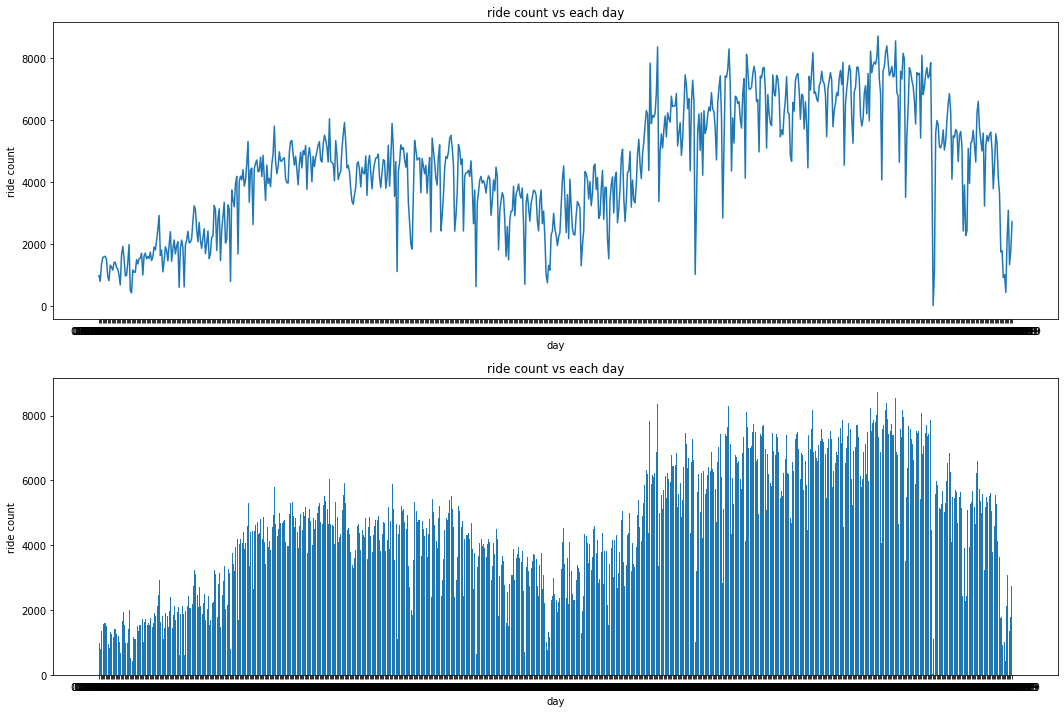

In [357]:
plt.figure(figsize=(18,12))
plt.subplot(2,1,1)
plt.plot(df["dteday"],df["cnt"])
plt.xlabel("day")
plt.ylabel("ride count")
plt.title("ride count vs each day")
plt.subplot(2,1,2)
plt.bar(df["dteday"],df["cnt"])
plt.xlabel("day")
plt.ylabel("ride count")
plt.title("ride count vs each day")

In [358]:
df["dteday"]=df["dteday"].apply(lambda x: int(x.split("-")[0]))
df.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [359]:
# plt.figure(figsize=(15,8))
# plt.subplot(1,2,1)
# plt.bar(df["season"],df["cnt"])
# plt.xticks((1,2,3,4),('spring','summer','fall','winter'))
# plt.xlabel("season")
# plt.ylabel("ride count")
# plt.subplot(1,2,2)
# sns.boxplot(df["season"],df["cnt"])
# plt.xticks((0,1,2,3),('spring','summer','fall','winter'))
# plt.xlabel("season")
# plt.ylabel("ride count")
# plt.show()

In [360]:
# plt.figure(figsize=(12,8))
# plt.subplot(1,2,1)
# plt.bar(df["yr"],df["cnt"])
# plt.xticks((0,1),("2018","2019"))
# plt.xlabel("year")
# plt.ylabel("ride count")
# plt.subplot(1,2,2)
# sns.boxplot(df["yr"],df["cnt"])
# plt.xticks((0,1),("2018","2019"))
# plt.xlabel("year")
# plt.ylabel("ride count")
# plt.show()

In [361]:

# plt.figure(figsize=(18,8))
# plt.subplot(1,2,1)
# plt.bar(df["mnth"],df["cnt"])
# plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12),("January", "February", "March", "April", "May"," June", "July", "August", "September", "October", "November"," December"),rotation=90)
# plt.xlabel("months")
# plt.ylabel("ride count")
# plt.subplot(1,2,2)
# sns.boxplot(df["mnth"],df["cnt"])
# plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12),("January", "February", "March", "April", "May"," June", "July", "August", "September", "October", "November"," December"),rotation=90)
# plt.xlabel("months")
# plt.ylabel("ride count")
# plt.show()

In [362]:
# plt.figure(figsize=(12,8))
# plt.subplot(1,2,1)
# plt.bar(df["holiday"],df["cnt"])
# plt.xticks((1,0),("Holiday","Working day"))
# plt.xlabel("holiday vs working day")
# plt.ylabel("ride count")
# plt.subplot(1,2,2)
# sns.boxplot(df["holiday"],df["cnt"])
# plt.show()

In [363]:
# plt.figure(figsize=(15,8))
# plt.subplot(1,2,1)
# plt.bar(df["weekday"],df["cnt"])
# plt.xticks((0,1,2,3,4,5,6),("Monday" ,"Tuesday", "Wednesday"," Thursday","Friday","Saturday","Sunday"))
# plt.xlabel("weekday")
# plt.ylabel("ride count")

# plt.subplot(1,2,2)
# sns.boxplot(df["weekday"],df["cnt"])
# plt.xticks((0,1,2,3,4,5,6),("Monday" ,"Tuesday", "Wednesday"," Thursday","Friday","Saturday","Sunday"))
# plt.xlabel("weekday")
# plt.ylabel("ride count")
# plt.show()

###weathersit
		1: Clear, Few clouds, Partly cloudy, Partly cloudy
		2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog




In [364]:
# plt.figure(figsize=(15,8))
# plt.subplot(1,2,1)
# plt.bar(df["weathersit"],df["cnt"])
# plt.xticks((1,2,3),("Clear","Mist","Light"))
# plt.xlabel("weather")
# plt.ylabel("ride count")

# plt.subplot(1,2,2)
# sns.boxplot(df["weathersit"],df["cnt"])
# plt.xticks((0,1,2),("Clear","Mist","Light"))
# plt.xlabel("weather")
# plt.ylabel("ride count")
# plt.show()

In [365]:
# plt.figure(figsize=(18,9))
# # plt.bar(df.hum.apply(int),df.cnt)
# sns.barplot(data=df,x=df.hum.apply(int),y=df.cnt)
# plt.show()

##Transforming Data

In [366]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [367]:
#since week days do not play huge role as we can see the box plot therefore we are removing the weekdays
df=df.drop("weekday",axis=1)

In [368]:
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
# df["weekday"]=df['weekday'].map({0:"Monday" ,1:"Tuesday",2: "Wednesday",3:" Thursday",4:"Friday",5:"Saturday",6:"Sunday"})
df["yr"]=df["yr"].map({0:"2018",1:"2019"})
df["mnth"]=df["mnth"].map({1:"January",2: "February",3: "March",4: "April",5: "May",6:" June", 7:"July",8: "August",9: "September",10: "October",11: "November",12:" December"})
df["weathersit"]=df["weathersit"].map({1:"clear",2:"wind",3:"light",4:"heavy"})

In [369]:
df.head()

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,
1,1,spring,2018,January,0,0,wind,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2,spring,2018,January,0,0,wind,14.902598,17.68695,69.6087,16.652113,131,670,801
3,3,spring,2018,January,0,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,4,spring,2018,January,0,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,5,spring,2018,January,0,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [370]:
#Dummy Variables
# dummy=["weekday","season","mnth","weathersit"]
dummy=["season","mnth","weathersit"]
dummy_series=pd.get_dummies(df[dummy],drop_first=True)
dummy_series.head()

,season_spring,season_summer,season_winter,mnth_ June,mnth_April,mnth_August,mnth_February,mnth_January,mnth_July,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_light,weathersit_wind
instant,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [371]:
df=pd.concat([df,dummy_series],axis=1)

In [372]:
df=df.drop(dummy,axis=1)

In [373]:
df.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_ June', 'mnth_April',
       'mnth_August', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weathersit_light', 'weathersit_wind'],
      dtype='object')

In [374]:
df.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_February,mnth_January,mnth_July,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_light,weathersit_wind
instant,,,,,,,,,,,,,,,,,,,,,
1,1,2018,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,1,0,0,0,0,0,0,0,1
2,2,2018,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,1,0,0,0,0,0,0,0,1
3,3,2018,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,1,0,0,0,0,0,0,0,0
4,4,2018,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,1,0,0,0,0,0,0,0,0
5,5,2018,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,1,0,0,0,0,0,0,0,0


##Splitting the Data into Training and Testing Sets

In [375]:
df_train,df_test=train_test_split(df,train_size=0.70,random_state=42)

In [376]:
df_train.shape

(510, 27)

In [377]:
df_test.shape

(220, 27)

In [378]:
df_train.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_ June', 'mnth_April',
       'mnth_August', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weathersit_light', 'weathersit_wind'],
      dtype='object')

In [379]:
###changing yr column from object to integer
df_train["yr"]=pd.to_numeric(df_train["yr"]) 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 646 to 103
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dteday            510 non-null    int64  
 1   yr                510 non-null    int64  
 2   holiday           510 non-null    int64  
 3   workingday        510 non-null    int64  
 4   temp              510 non-null    float64
 5   atemp             510 non-null    float64
 6   hum               510 non-null    float64
 7   windspeed         510 non-null    float64
 8   casual            510 non-null    int64  
 9   registered        510 non-null    int64  
 10  cnt               510 non-null    int64  
 11  season_spring     510 non-null    uint8  
 12  season_summer     510 non-null    uint8  
 13  season_winter     510 non-null    uint8  
 14  mnth_ June        510 non-null    uint8  
 15  mnth_April        510 non-null    uint8  
 16  mnth_August       510 non-null    uint8  


##Rescaling the Features

In [380]:
scaling_col=["dteday","temp","atemp","hum","windspeed","casual","registered","cnt"]

In [381]:
scaler=MinMaxScaler()
df_train[scaling_col]=scaler.fit_transform(df_train[scaling_col])
df_train.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_February,mnth_January,mnth_July,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_light,weathersit_wind
instant,,,,,,,,,,,,,,,,,,,,,
646,0.233333,2019,1,0,0.403972,0.404998,0.731215,0.419004,0.266728,0.641348,...,0,0,0,0,0,0,1,0,0,1
164,0.400000,2018,0,1,0.717562,0.685963,0.509660,0.708724,0.263336,0.572894,...,0,0,0,0,0,0,0,0,0,0
361,0.866667,2018,0,1,0.331287,0.326273,0.785745,0.415925,0.028986,0.098469,...,0,0,0,0,0,0,0,0,0,1
641,0.066667,2019,0,1,0.745598,0.682653,0.817947,0.110593,0.221708,0.984380,...,0,0,0,0,0,0,1,0,0,1
626,0.566667,2019,0,1,0.703024,0.637937,0.899098,0.839562,0.111625,0.503216,...,0,0,0,0,0,0,0,1,0,1


In [382]:
df_train.describe()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_February,mnth_January,mnth_July,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_light,weathersit_wind
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.479739,2018.519608,0.027451,0.668627,0.551313,0.526919,0.654203,0.415045,0.262306,0.501615,...,0.074510,0.088235,0.092157,0.062745,0.092157,0.090196,0.090196,0.090196,0.029412,0.345098
std,0.292471,0.500106,0.163554,0.471169,0.227237,0.212992,0.143788,0.185760,0.207506,0.240990,...,0.262857,0.283915,0.289531,0.242742,0.289531,0.286744,0.286744,0.286744,0.169124,0.475867
min,0.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,2018.000000,0.000000,0.000000,0.354526,0.354454,0.544033,0.281934,0.102066,0.338668,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.466667,2019.000000,0.000000,1.000000,0.575824,0.564951,0.660798,0.384737,0.225100,0.506815,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.733333,2019.000000,0.000000,1.000000,0.745338,0.698389,0.756977,0.526489,0.334798,0.671095,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [383]:
# plt.figure(figsize = (22, 16))
# sns.heatmap(round(df_train.corr(),1), annot = True, cmap="YlGnBu")
# plt.show()

#####Dividing into X and Y sets for the model building

In [384]:
y_train=df_train.pop("cnt")
X_train=df_train

In [385]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 646 to 103
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dteday            510 non-null    float64
 1   yr                510 non-null    int64  
 2   holiday           510 non-null    int64  
 3   workingday        510 non-null    int64  
 4   temp              510 non-null    float64
 5   atemp             510 non-null    float64
 6   hum               510 non-null    float64
 7   windspeed         510 non-null    float64
 8   casual            510 non-null    float64
 9   registered        510 non-null    float64
 10  season_spring     510 non-null    uint8  
 11  season_summer     510 non-null    uint8  
 12  season_winter     510 non-null    uint8  
 13  mnth_ June        510 non-null    uint8  
 14  mnth_April        510 non-null    uint8  
 15  mnth_August       510 non-null    uint8  
 16  mnth_February     510 non-null    uint8  



##Making model 1


In [308]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,n_features_to_select=16)
rfe=rfe.fit(X_train,y_train)
rfe_data=pd.DataFrame({"column":X_train.columns,"status":rfe.support_,"ranking":rfe.ranking_})
rfe_data.sort_values("ranking")

,column,status,ranking
25,weathersit_wind,True,1
16,mnth_February,True,1
15,mnth_August,True,1
14,mnth_April,True,1
13,mnth_ June,True,1
11,season_summer,True,1
10,season_spring,True,1
17,mnth_January,True,1
9,registered,True,1
5,atemp,True,1


In [309]:
col=X_train.columns[rfe.support_]
print(f"the columns are {col}")
X_train=X_train[col]

the columns are Index(['yr', 'temp', 'atemp', 'casual', 'registered', 'season_spring',
       'season_summer', 'mnth_ June', 'mnth_April', 'mnth_August',
       'mnth_February', 'mnth_January', 'mnth_July', 'mnth_May',
       'mnth_September', 'weathersit_wind'],
      dtype='object')


In [310]:
X_train.head()

,yr,temp,atemp,casual,registered,season_spring,season_summer,mnth_ June,mnth_April,mnth_August,mnth_February,mnth_January,mnth_July,mnth_May,mnth_September,weathersit_wind
instant,,,,,,,,,,,,,,,,
646,2019,0.403972,0.404998,0.266728,0.641348,0,0,0,0,0,0,0,0,0,0,1
164,2018,0.717562,0.685963,0.263336,0.572894,0,1,1,0,0,0,0,0,0,0,0
361,2018,0.331287,0.326273,0.028986,0.098469,1,0,0,0,0,0,0,0,0,0,1
641,2019,0.745598,0.682653,0.221708,0.984380,0,0,0,0,0,0,0,0,0,0,1
626,2019,0.703024,0.637937,0.111625,0.503216,0,0,0,0,0,0,0,0,0,1,1


##VIF

In [311]:
def vif_function(df):
  vif=pd.DataFrame()
  vif["feature"]=df.columns
  vif["VIF"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
  vif["VIF"]=round(vif["VIF"],2)
  vif=vif.sort_values(by="VIF",ascending=False)
  return vif


In [312]:
print(vif_function(X_train))
X_train_sm=sm.add_constant(X_train)
lr_model=sm.OLS(y_train,X_train_sm).fit()
lr_model.summary()

TypeError: ignored

In [189]:
X_train=X_train.drop("atemp",1)
print(vif_function(X_train))
X_train_sm=sm.add_constant(X_train)
lr_model=sm.OLS(y_train,X_train_sm).fit()
lr_model.summary()

             feature    VIF
2               temp  34.01
0                 yr  30.09
4         registered  17.28
3             casual   9.04
1         workingday   8.17
5      season_summer   4.10
6      season_winter   3.27
10         mnth_July   2.56
9       mnth_January   2.20
7        mnth_August   2.09
8      mnth_February   1.85
12    mnth_September   1.79
11          mnth_May   1.59
13  weathersit_light   1.14


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.841e+26
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:12:04   Log-Likelihood:                 10039.
No. Observations:                 510   AIC:                        -2.005e+04
Df Residuals:                     495   BIC:                        -1.998e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.317e-09   1.97e-07     -0.007      0.995   -3.89e-07    3.86e-07
yr                3.126e-13   9.77e-11      0.003      0.997   -1.92e-10    1.92e-10
workingday         -2.7e-13   1.14e-10     -0.002      0.998   -2.23e-10    2.23e-10
temp              1.732e-14   8.82e-12      0.002      0.998   -1.73e-11    1.74e-11
casual               1.0000   8.47e-14   1.18e+13      0.000       1.000       1.000
registered           1.0000   4.74e-14   2.11e+13      0.000       1.000       1.000
season_summer     3.979e-13   1.23e-10      0.003      0.997   -2.42e-10    2.43e-10
season_winter     3.126e-13   1.17e-10      0.003      0.998    -2.3e-10    2.31e-10
mnth_August      -7.105e-13   1.63e-10     -0.004      0.997   -3.21e-10     3.2e-10
mnth_February    -1.847e-13   1.53e-10     -0.001      0.999   -3.01e-10    3.01e-10
mnth_January      2.274e-13   1.53e-10      0.001      0.999   -3.01e-10    3.02e-10
mnth_July        -2.842e-13   1.62e-10     -0.002      0.999   -3.19e-10    3.18e-10
mnth_May         -7.212e-13   1.28e-10     -0.006      0.996   -2.52e-10     2.5e-10
mnth_September    6.395e-13   1.39e-10      0.005      0.996   -2.72e-10    2.73e-10
weathersit_light -1.442e-12   1.97e-10     -0.007      0.994   -3.89e-10    3.86e-10
==============================================================================
Omnibus:                        5.858   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                4.047
Skew:                           0.049   Prob(JB):                        0.132
Kurtosis:                       2.575   Cond. No.                     2.90e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

since here we can see it is very hard for us to eliminate the variable therefore we will use RFE method




In [190]:
X_train.shape

(510, 14)

In [191]:
X_train=X_train.drop("registered",1)
print(vif_function(X_train))
X_train_sm=sm.add_constant(X_train)
lr_model=sm.OLS(y_train,X_train_sm).fit()
lr_model.summary()

             feature    VIF
2               temp  32.56
0                 yr  30.08
3             casual   7.12
1         workingday   5.56
4      season_summer   4.10
5      season_winter   3.00
9          mnth_July   2.56
8       mnth_January   2.20
6        mnth_August   2.08
7      mnth_February   1.84
11    mnth_September   1.77
10          mnth_May   1.59
12  weathersit_light   1.10


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     302.3
Date:                Fri, 27 Jan 2023   Prob (F-statistic):          5.49e-226
Time:                        15:12:18   Log-Likelihood:                -4026.0
No. Observations:                 510   AIC:                             8080.
Df Residuals:                     496   BIC:                             8139.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.081e+06   1.26e+05    -24.525      0.000   -3.33e+06   -2.83e+06
yr                1526.6822     62.251     24.525      0.000    1404.374    1648.990
workingday        1435.8174     86.174     16.662      0.000    1266.506    1605.129
temp                75.2468      7.650      9.836      0.000      60.216      90.278
casual               1.6012      0.076     21.163      0.000       1.453       1.750
season_summer      274.1451    116.304      2.357      0.019      45.637     502.653
season_winter     1038.4309    101.102     10.271      0.000     839.789    1237.073
mnth_August        263.7964    154.182      1.711      0.088     -39.135     566.728
mnth_February      120.0972    144.983      0.828      0.408    -164.759     404.953
mnth_January        41.6692    145.475      0.286      0.775    -244.155     327.493
mnth_July           40.3837    153.623      0.263      0.793    -261.449     342.216
mnth_May           102.1625    121.085      0.844      0.399    -135.740     340.065
mnth_September     561.9620    129.136      4.352      0.000     308.241     815.683
weathersit_light -1274.6143    177.812     -7.168      0.000   -1623.972    -925.256
==============================================================================
Omnibus:                      111.861   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.241
Skew:                          -1.056   Prob(JB):                     5.80e-69
Kurtosis:                       6.214   Cond. No.                     9.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [192]:
#since the p-value and VIF of  atemp is very high therefore we will remove it
X_train=X_train.drop('mnth_July',1)
print(vif_function(X_train))
X_train_sm=sm.add_constant(X_train)
lr_model=sm.OLS(y_train,X_train_sm).fit()
lr_model.summary()

             feature    VIF
0                 yr  29.70
2               temp  24.96
3             casual   7.12
1         workingday   5.56
4      season_summer   2.98
5      season_winter   2.53
8       mnth_January   2.17
7      mnth_February   1.78
9           mnth_May   1.58
6        mnth_August   1.43
10    mnth_September   1.33
11  weathersit_light   1.09


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     328.1
Date:                Fri, 27 Jan 2023   Prob (F-statistic):          3.07e-227
Time:                        15:13:08   Log-Likelihood:                -4026.0
No. Observations:                 510   AIC:                             8078.
Df Residuals:                     497   BIC:                             8133.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.081e+06   1.26e+05    -24.548      0.000   -3.33e+06   -2.83e+06
yr                1526.6992     62.193     24.548      0.000    1404.506    1648.892
workingday        1435.1454     86.056     16.677      0.000    1266.068    1604.223
temp                76.2121      6.705     11.366      0.000      63.038      89.386
casual               1.6013      0.076     21.183      0.000       1.453       1.750
season_summer      258.2385     99.230      2.602      0.010      63.276     453.201
season_winter     1027.9649     92.846     11.072      0.000     845.546    1210.384
mnth_August        241.1057    127.636      1.889      0.059      -9.667     491.878
mnth_February      113.3336    142.548      0.795      0.427    -166.737     393.404
mnth_January        37.4178    144.438      0.259      0.796    -246.367     321.203
mnth_May            99.6982    120.608      0.827      0.409    -137.267     336.663
mnth_September     545.0591    111.885      4.872      0.000     325.234     764.884
weathersit_light -1273.4811    177.593     -7.171      0.000   -1622.407    -924.555
==============================================================================
Omnibus:                      111.693   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.803
Skew:                          -1.054   Prob(JB):                     7.22e-69
Kurtosis:                       6.213   Cond. No.                     9.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#since the p-value and VIF of  yr is very high therefore we will remove it
X_train=X_train.drop('mnth_November',1)
print(vif_function(X_train))
X_train_sm=sm.add_constant(X_train)
lr_model=sm.OLS(y_train,X_train_sm).fit()
lr_model.summary()

             feature    VIF
4         registered  16.71
2              atemp  15.11
3             casual   9.44
1         workingday   9.22
6      season_spring   3.84
7      season_summer   2.44
10      mnth_January   2.32
8      season_winter   2.18
9      mnth_February   2.11
12      mnth_October   1.64
11          mnth_May   1.56
13    mnth_September   1.31
5   weekday_Saturday   1.28
0            holiday   1.11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.628e+30
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:54:29   Log-Likelihood:                 12640.
No. Observations:                 510   AIC:                        -2.525e+04
Df Residuals:                     495   BIC:                        -2.519e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.842e-14   1.53e-12      0.019      0.985   -2.99e-12    3.04e-12
holiday           2.409e-11   1.19e-12     20.172      0.000    2.17e-11    2.64e-11
workingday        2.558e-13   7.01e-13      0.365      0.716   -1.12e-12    1.63e-12
atemp            -6.017e-14   4.87e-14     -1.236      0.217   -1.56e-13    3.55e-14
casual               1.0000   5.31e-16   1.88e+15      0.000       1.000       1.000
registered           1.0000   1.91e-16   5.23e+15      0.000       1.000       1.000
weekday_Saturday  5.365e-13   5.89e-13      0.911      0.363   -6.21e-13    1.69e-12
season_spring     4.832e-13   1.09e-12      0.444      0.657   -1.65e-12    2.62e-12
season_summer    -1.144e-12   7.09e-13     -1.614      0.107   -2.54e-12    2.49e-13
season_winter    -8.349e-13   8.55e-13     -0.976      0.329   -2.52e-12    8.46e-13
mnth_February     1.165e-12      1e-12      1.162      0.246   -8.05e-13    3.14e-12
mnth_January      1.506e-12   9.87e-13      1.526      0.128   -4.33e-13    3.45e-12
mnth_May         -2.842e-14   7.82e-13     -0.036      0.971   -1.57e-12    1.51e-12
mnth_October      7.923e-13   8.22e-13      0.964      0.335   -8.22e-13    2.41e-12
mnth_September    9.708e-13    7.2e-13      1.349      0.178   -4.43e-13    2.38e-12
==============================================================================
Omnibus:                      544.514   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17462.306
Skew:                          -5.134   Prob(JB):                         0.00
Kurtosis:                      29.764   Cond. No.                     4.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
#since the p-value and VIF of  temp is very high therefore we will remove it
X_train=X_train.drop('registered',1)
print(vif_function(X_train))
X_train_sm=sm.add_constant(X_train)
lr_model=sm.OLS(y_train,X_train_sm).fit()
lr_model.summary()

             feature    VIF
2              atemp  13.98
3             casual   7.18
1         workingday   6.28
5      season_spring   3.79
6      season_summer   2.43
9       mnth_January   2.30
8      mnth_February   2.09
7      season_winter   2.01
11      mnth_October   1.64
10          mnth_May   1.56
12    mnth_September   1.30
4   weekday_Saturday   1.27
0            holiday   1.11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     110.7
Date:                Fri, 27 Jan 2023   Prob (F-statistic):          2.61e-137
Time:                        14:55:29   Log-Likelihood:                -4236.9
No. Observations:                 510   AIC:                             8502.
Df Residuals:                     496   BIC:                             8561.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              166.0646    360.435      0.461      0.645    -542.104     874.233
holiday            221.5436    280.402      0.790      0.430    -329.378     772.465
workingday        2047.5975    136.760     14.972      0.000    1778.896    2316.299
atemp               36.8269     11.313      3.255      0.001      14.599      59.055
casual               2.3472      0.109     21.527      0.000       2.133       2.561
weekday_Saturday  -165.5027    138.211     -1.197      0.232    -437.053     106.048
season_spring     -514.6072    254.608     -2.021      0.044   -1014.850     -14.365
season_summer     -211.6842    166.243     -1.273      0.203    -538.312     114.943
season_winter      727.2339    198.263      3.668      0.000     337.696    1116.772
mnth_February      507.4911    234.516      2.164      0.031      46.723     968.259
mnth_January       395.3669    231.148      1.710      0.088     -58.783     849.517
mnth_May           228.0512    183.485      1.243      0.214    -132.452     588.554
mnth_October       -34.4852    193.030     -0.179      0.858    -413.742     344.772
mnth_September     343.5882    168.337      2.041      0.042      12.848     674.329
==============================================================================
Omnibus:                        4.777   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                4.785
Skew:                          -0.211   Prob(JB):                       0.0914
Kurtosis:                       2.783   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#since the p-value and VIF of  registered is very high therefore we will remove it
# X_train=X_train.drop('registered',1)
print(vif_function(X_train))
X_train_sm=sm.add_constant(X_train)
lr_model_new=sm.OLS(y_train,X_train_sm).fit()
lr_model.summary()

In [ ]:
#we will build the model with these column values
X_train.columns

In [ ]:
X_train.shape

###we will build the model with these column values
'holiday', 'casual', 'weekday_Saturday', 'weekday_Wednesday',
       'season_summer', 'season_winter', 'mnth_April', 'mnth_August',
       'mnth_February', 'mnth_January', 'mnth_July', 'mnth_March',
       'mnth_November', 'mnth_October', 'mnth_September', 'weathersit_light'

##Error Distribution

In [ ]:
y_pred_val=lr_model.predict(X_train_sm)
residual=y_pred_val-y_train
sns.distplot(residual)
plt.show()